# Linear Regression - home brew vs scikit-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
from sklearn import metrics 

In [8]:
data = pd.read_csv('../../data/Advertising.csv')
data['total_spend'] = (data['TV'] + data['radio'] + data['newspaper'])/10 #scale total_spend to sales

In [10]:
print(data)

     Unnamed: 0     TV  radio  newspaper  sales  total_spend
0             1  230.1   37.8       69.2   22.1        33.71
1             2   44.5   39.3       45.1   10.4        12.89
2             3   17.2   45.9       69.3    9.3        13.24
3             4  151.5   41.3       58.5   18.5        25.13
4             5  180.8   10.8       58.4   12.9        25.00
..          ...    ...    ...        ...    ...          ...
195         196   38.2    3.7       13.8    7.6         5.57
196         197   94.2    4.9        8.1    9.7        10.72
197         198  177.0    9.3        6.4   12.8        19.27
198         199  283.6   42.0       66.2   25.5        39.18
199         200  232.1    8.6        8.7   13.4        24.94

[200 rows x 6 columns]


In [11]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales,total_spend
0,1,230.1,37.8,69.2,22.1,33.71
1,2,44.5,39.3,45.1,10.4,12.89
2,3,17.2,45.9,69.3,9.3,13.24
3,4,151.5,41.3,58.5,18.5,25.13
4,5,180.8,10.8,58.4,12.9,25.00


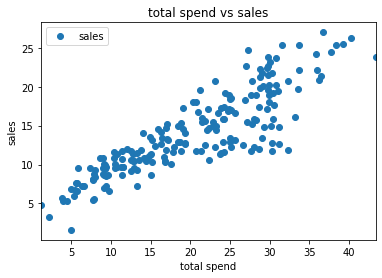

In [12]:
data.plot(x='total_spend', y='sales', style='o')  
plt.title('total spend vs sales')  
plt.xlabel('total spend')  
plt.ylabel('sales')  
plt.show()  

## DIY approach

In [13]:
# helper function to calculate loss
def avg_loss(spendings, sales, w, b):
    N = len(spendings)
    total_error = 0.0
    
    for i in range(N):
        total_error += (sales[i] - (w * spendings[i] + b))**2
    
    return total_error / float(N)

In [14]:
def update_w_and_b(spendings, sales, w, b, alpha):
    dl_dw = 0.0
    dl_db = 0.0
    N = len(spendings)
    
    for i in range(N):
        dl_dw += -2 * spendings[i] * (sales[i] - (w * spendings[i] + b))
        dl_db += -2 * (sales[i] - (w * spendings[i] + b))
        
    # update w and b
    w = w - (1/float(N)) * dl_dw * alpha
    b = b - (1/float(N)) * dl_db * alpha
    
    return w, b

In [15]:
def train(spendings, sales, w, b, alpha, epochs):
    for e in range(epochs):
        w, b = update_w_and_b(spendings, sales, w, b, alpha)
        
        # log the progress
        if e % 1000 == 0:
            print('epoch:', e, 'loss: ', avg_loss(spendings, sales, w, b))
            
    return w, b

In [16]:
def predict(x, w, b):
    return w * x + b

In [17]:
w, b = train(data['total_spend'], data['sales'], 0.0, 0.0, 0.001, 15000)

epoch: 0 loss:  9.894417306428116
epoch: 1000 loss:  8.239383043542533
epoch: 2000 loss:  7.459002946874042
epoch: 3000 loss:  7.0722420301112905
epoch: 4000 loss:  6.880561069290071
epoch: 5000 loss:  6.78556286975927
epoch: 6000 loss:  6.73848120929894
epoch: 7000 loss:  6.7151472644173476
epoch: 8000 loss:  6.703582825559119
epoch: 9000 loss:  6.697851422370157
epoch: 10000 loss:  6.695010905599979
epoch: 11000 loss:  6.693603128960358
epoch: 12000 loss:  6.692905426666231
epoch: 13000 loss:  6.692559641349493
epoch: 14000 loss:  6.6923882681344695


In [18]:
x_new = 23.0
y_new = predict(x_new, w, b)
y_new

15.440023160711576

In [19]:
out = []
for i in range(len(data)):
    tmp = predict(data['total_spend'][i], w, b)
    out.append(tmp)

df = pd.DataFrame({'Actual': data['sales'], 'Predicted': out})  
df.head()

,Actual,Predicted
0,22.1,20.664078
1,10.4,10.508632
2,9.3,10.679353
3,18.5,16.478981
4,12.9,16.415570


In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(df.Actual, df.Predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(df.Actual, df.Predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df.Actual, df.Predicted))) 

Mean Absolute Error: 1.9503045740850404
Mean Squared Error: 6.692303393174859
Root Mean Squared Error: 2.5869486645805053


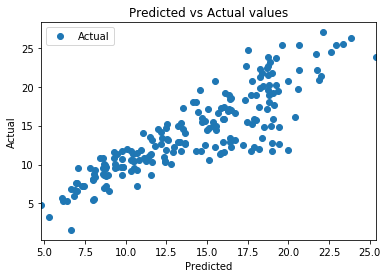

In [21]:
df.plot(x='Predicted', y='Actual', style='o')  
plt.title('Predicted vs Actual values')  
plt.xlabel('Predicted')  
plt.ylabel('Actual')  
plt.show() 

---

## Scikit-learn approach

In [48]:
# prepare features and labels in a format suitable for scikit-learn
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)  

train_test_split splits a dataset to use a specified percentage of the dataset picked randomly as the training set and the rest as the test set; picks different datapoints based on random_state (different seed for random number generator)

In [61]:
print(X_train)
X_test.head()
print(y_train)
y_test.head()

        TV  radio  newspaper
108   13.1    0.4       25.6
107   90.4    0.3       23.2
189   18.7   12.1       23.4
14   204.1   32.9       46.0
56     7.3   28.1       41.4
..     ...    ...        ...
133  219.8   33.5       45.1
137  273.7   28.9       59.7
72    26.8   33.0       19.3
140   73.4   17.0       12.9
37    74.7   49.4       45.7

[160 rows x 3 columns]
108     5.3
107     8.7
189     6.7
14     19.0
56      5.5
       ... 
133    19.6
137    20.8
72      8.8
140    10.9
37     14.7
Name: sales, Length: 160, dtype: float64


58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
Name: sales, dtype: float64

In [62]:
def train(x, y):
    model = LinearRegression().fit(x,y)
    return model

In [63]:
model = train(X_train, y_train)

In [64]:
# return interecept and coefficient
print(model.intercept_, model.coef_)  

2.907947020816433 [0.0468431  0.17854434 0.00258619]


In [65]:
y_pred = model.predict(X_test)  

In [66]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
58,23.8,21.735772
40,16.6,16.456938
34,9.5,7.659932
102,14.8,17.892027
184,17.6,18.677307


In [67]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 1.0402154012924718
Mean Squared Error: 1.9918855518287906
Root Mean Squared Error: 1.4113417558581587


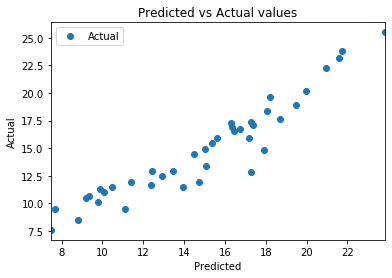

In [68]:
df.plot(x='Predicted', y='Actual', style='o')  
plt.title('Predicted vs Actual values')  
plt.xlabel('Predicted')  
plt.ylabel('Actual')  
plt.show() 